## Import Modules

In [1]:
from ast import increment_lineno
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

## Unzip the data

In [2]:
!unzip Train_UQcUa52.zip

Streaming output truncated to the last 5000 lines.
 extracting: Images/train/55.png     
 extracting: Images/train/550.png    
 extracting: Images/train/5500.png   
 extracting: Images/train/5501.png   
 extracting: Images/train/5502.png   
 extracting: Images/train/5503.png   
 extracting: Images/train/5504.png   
 extracting: Images/train/5505.png   
 extracting: Images/train/5506.png   
 extracting: Images/train/5507.png   
 extracting: Images/train/5508.png   
 extracting: Images/train/5509.png   
 extracting: Images/train/551.png    
 extracting: Images/train/5510.png   
 extracting: Images/train/5511.png   
 extracting: Images/train/5512.png   
 extracting: Images/train/5513.png   
 extracting: Images/train/5514.png   
 extracting: Images/train/5515.png   
 extracting: Images/train/5516.png   
 extracting: Images/train/5517.png   
 extracting: Images/train/5518.png   
 extracting: Images/train/5519.png   
 extracting: Images/train/552.png    
 extracting: Images/train/5520.png   

## Load the train data

In [3]:
df = pd.read_csv('train.csv')
df.head()

filename  label
0    0.png      4
1    1.png      9
2    2.png      1
3    3.png      7
4    4.png      3

In [4]:
!pwd

/content


In [5]:
image_path = 'Images/train/'

In [6]:
X = np.array([img_to_array(load_img(image_path+df['filename'][i],
                                    target_size=(28,28,1),
                                    color_mode='grayscale'))
              for i in tqdm(range(df.shape[0]))
              ]).astype('float32')
    # image size is 28 x 28 x 1
    # channel = 1 because the image is grayscale

  0%|          | 0/49000 [00:00<?, ?it/s]

In [7]:
Y = df['label']

In [8]:
print(X.shape, Y.shape)

(49000, 28, 28, 1) (49000,)


## EDA

9


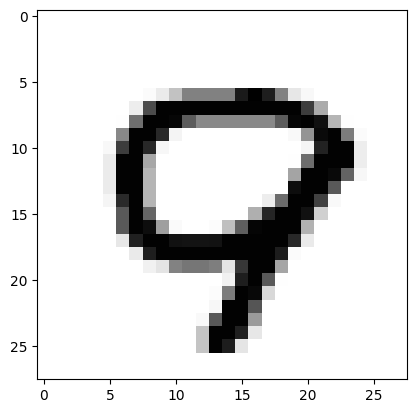

In [9]:
image_index = 26
print(Y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap = 'Greys')

## Splitting the data to train and test

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.25, random_state= 42, stratify= np.array(Y))
# stratify will split the test data with uniform class distribution

In [11]:
# Normalization
x_train /= 255
x_test /= 255
# pixel values for grayscale is between 0 an 255

## Model Creation

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Dropout will be used to add regularization
# Dense = FC layer

In [13]:
input_shape =(28,28,1)
output_class = 10

In [14]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape= input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation= tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(output_class, activation=tf.nn.softmax))


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Train the model
model.fit(x=x_train, y= y_train, batch_size=32, epochs= 30, validation_data=(x_test, y_test))

Epoch 1/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8561 - loss: 0.4766 - val_accuracy: 0.9634 - val_loss: 0.1213
Epoch 2/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9610 - loss: 0.1268 - val_accuracy: 0.9727 - val_loss: 0.0872
Epoch 3/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9738 - loss: 0.0849 - val_accuracy: 0.9772 - val_loss: 0.0777
Epoch 4/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9780 - loss: 0.0663 - val_accuracy: 0.9786 - val_loss: 0.0687
Epoch 5/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9847 - loss: 0.0463 - val_accuracy: 0.9803 - val_loss: 0.0681
Epoch 6/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9858 - loss: 0.0436 - val_accuracy: 0.9804 - val_loss: 0.0713
Epoch 7/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9877 - loss: 0.0344 - val_accuracy: 0.9811 - val_loss: 0.0701
Epoch 8/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9896 - loss: 0.0285 -

## Testing the model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
Predicted output: 1


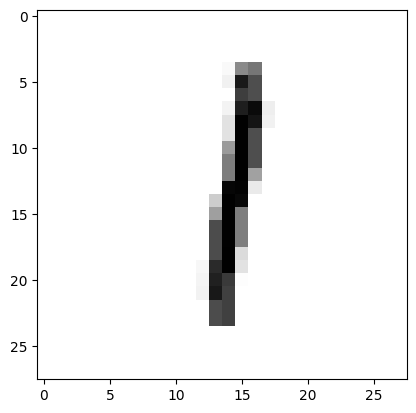

In [16]:
image_index = 10
plt.imshow(x_test[image_index].reshape(28,28), cmap ='Greys')
prediction = model.predict(x_test[image_index].reshape(1,28,28,1))
print('Predicted output:', prediction.argmax())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted output: 8


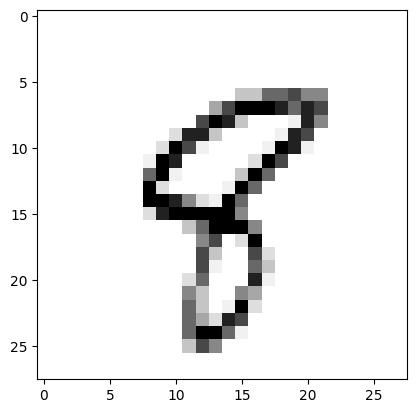

In [17]:
image_index = 100
plt.imshow(x_test[image_index].reshape(28,28), cmap ='Greys')
prediction = model.predict(x_test[image_index].reshape(1,28,28,1))
print('Predicted output:', prediction.argmax())